In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-in-graphs-hw1/hw1-q1-starter.py
/kaggle/input/ml-in-graphs-hw1/ca-GrQc.txt
/kaggle/input/ml-in-graphs-hw1/hw1-q2.graph
/kaggle/input/ml-in-graphs-hw1/netscience.gml
/kaggle/input/ml-in-graphs-hw1/netscience.txt
/kaggle/input/cs224whw2018/q1-sample.txt
/kaggle/input/cs224whw2018/6.txt
/kaggle/input/cs224whw2018/all_gene_disease_associations.tsv.gz
/kaggle/input/cs224whw2018/2.txt
/kaggle/input/cs224whw2018/esu_test.txt
/kaggle/input/cs224whw2018/1.txt
/kaggle/input/cs224whw2018/email-Eu-core.txt
/kaggle/input/cs224whw2018/12.txt
/kaggle/input/cs224whw2018/stackoverflow-Java.txt.gz
/kaggle/input/cs224whw2018/8.txt
/kaggle/input/cs224whw2018/wiki-Vote.txt.gz
/kaggle/input/cs224whw2018/10.txt
/kaggle/input/cs224whw2018/ca-GrQc.txt.gz
/kaggle/input/cs224whw2018/polblogs-rewired.txt
/kaggle/input/cs224whw2018/3.txt
/kaggle/input/cs224whw2018/0.txt
/kaggle/input/cs224whw2018/polblogs.txt
/kaggle/input/cs224whw2018/7.txt
/kaggle/input/cs224whw2018/graph2.txt
/kaggle/input/cs22

In [2]:
pip install snap-stanford

     |████████████████████████████████| 10.8 MB 3.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import snap
import pandas as pd
import numpy as np
import os
import glob
from IPython.display import Image
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
motifs_folder = '/kaggle/input/cs224whw2018/'

# Motif detection and configuration model

## The Configuration Model [10 points]
A common method for analyzing the properties of real world networks is to analyze their behavior
in comparison with a generated theoretical model referred to as a \null model." We have previously
discussed some null models in class (Lecture 2), such as the Erd}os-Renyi model and the configuration
model. While the Erd}os-Renyi model has many nice theoretical properties, the configuration model
is useful because it generates random networks with a specified degree sequence. In other words,
given a real network, the configuration model allows you to sample from the space of networks
that have the exact same sequence of degrees (i.e., the sampled random networks have the same
degree distribution as the network you are studying). For more background on the configuration
model, check out these lecture notes by Aaron Clauset: http://tuvalu.santafe.edu/~aaronc/courses/5352/fall2013/csci5352_2013_L11.pdf   
   
One way of using the configuration model to generate such a network is through the spoke matching
algorithm covered in Lecture 5. The intuition behind this algorithm is that we first break the
network apart into a bunch of \stubs", which are basically nodes with dangling edges (spokes);
then we generate a random network by randomly pairing up these spokes and connecting them.
Using this approach, however, has a couple of subtleties. For instance, this algorithm can sometimes
create improper (i.e. non-simple) networks with self-loops or multiple edges between two nodes;
if this happens, then you must reject this sampled network and try again. If you wish, you may
try to implement the configuration model using this method, but instead, we will use another
approach.

A second (and more popular) approach to sampling from the conguration model is to do \edge
rewiring". The idea with this algorithm is to start with an empirical network and then randomly
rewire edges until it is essentially random.   
   
Implement \edge rewiring" for the US power grid graph. To do this, load the USpowergrid n4941.txt
dataset as a PNGraph and iteratively repeat the following process:   
1. Randomly select two distinct edges e1 = (a; b) and e2 = (c; d) from the graph. Now, try to
re-wire these edges.   
2. Randomly select one of endpoint of edge e1 and call it u. Let v be the other endpoint in
e1. At this point, either u = a, v = b or u = b, v = a. Do the same for edge e2. Call the
randomly selected endpoint w and the other endpoint x.   
3. Perform the rewiring. In the graph, replace the directed edges e1 = (a; b) and e2 = (c; d) with
the directed edges (u;w) and (v; x) as long as this results in a simple network (no self-loops
or multi-edges). If the result is not a simple network, reject this rewiring and return to step
1; otherwise, keep the newly swapped edges and return to step 1.  
   
Test your implementation and verify that you did not alter the number of nodes or edges on the
original network. Run your edge rewiring implementation for 10,000 iterations on the power grid
network. Every 100 iterations, calculate the average clustering coefficient of the rewired network.
Then plot the average clustering coecient as a function of the number of iterations. Brie
y comment
on the curve that represents the model being rewired by explaining its shape.

In [5]:
# Small graph for testing
def test_esu_graph():
    G = snap.TNGraph.New()

    for i in range(1, 10):
        G.AddNode(i)

    labels = snap.TIntStrH()

    for Node in G.Nodes():
        labels[Node.GetId()] = str(Node.GetId())

    G.AddEdge(1, 2)
    G.AddEdge(2, 3)
    G.AddEdge(1, 3)
    G.AddEdge(1, 4)
    G.AddEdge(1, 5)
    G.AddEdge(8, 3)
    G.AddEdge(9, 3)
    G.AddEdge(2, 7)
    G.AddEdge(2, 6)
    return G
def draw_graph(G, fileout, show = True):
    labels = snap.TIntStrH()
    for Node in G.Nodes():
        labels[Node.GetId()] = str(Node.GetId())
    snap.DrawGViz(G, snap.gvlNeato, fileout, 'G', labels)
    if show:
        plt.imshow(mpimg.imread(fileout)); plt.axis('off')
        plt.show()

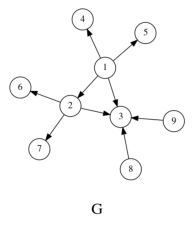

In [6]:
G = test_esu_graph()
draw_graph(G, 'test_esu.png')

In [7]:
def gen_config_model_rewire(G, N_iter, computeCls=True):
    """
    perform rewiring in graph
    N - number of tries for rewiring
    @param G: snap graph
    @param N_iter: Int, number of rewiring
    @param computeCls: bool, true for compute clustering coefficient
    @return: snap graph
    """
    G_rew = G
    edge_list = [edge.GetId() for edge in G_rew.Edges()]
    num_edges = len(edge_list)
    clustCoefs = []
    counter, n_shots = 0, 0
    while counter < N_iter and n_shots < 100000:

        n_shots += 1
        ix1, ix2 = np.random.randint(num_edges, size=2)
        e1, e2 = edge_list[ix1], edge_list[ix2]
        u, v = np.random.choice(e1, size=2, replace=False)
        w, x = np.random.choice(e2, size=2, replace=False)
        no_self_loops = u != w and v != x
        is_edges = G_rew.IsEdge(*e1) and G_rew.IsEdge(*e2)
        no_mul_edges = not G_rew.IsEdge(int(u), int(w)) and not G_rew.IsEdge(int(v), int(x))
        if no_self_loops and is_edges and no_mul_edges:
            G_rew.DelEdge(*e1)
            G_rew.DelEdge(*e2)
            G_rew.AddEdge(int(u), int(w))
            G_rew.AddEdge(int(v), int(x))
            counter += 1

        if computeCls and counter % 100 == 0:
            clustCoefs.append(snap.GetClustCf(G_rew, -1))

    return G_rew, clustCoefs


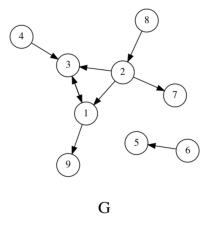

In [8]:
G_rew, clustCoefs = gen_config_model_rewire(G, 3)
draw_graph(G_rew, 'test_rew_esu.png')

In [9]:
def plot_cluster_coefs(clustering_coeffs):
    plt.plot(np.linspace(0,10000,len(clustering_coeffs)), clustering_coeffs)
    plt.xlabel('Iteration')
    plt.ylabel('Average Clustering Coefficient')
    plt.title('Random edge rewiring: Clustering Coefficient')
    plt.show()
    
def test_rewiring():
    """
    Main q3 workflow. All of the work can be done in gen_config_model_rewire
    but you may modify this function as needed.
    """

    graphpath = '/kaggle/input/cs224whw2018/USpowergrid_n4941.txt'
    G = load_graph(graphpath)
    config_graph, clustering_coeffs = gen_config_model_rewire(G, 10000)
    plot_cluster_coefs(clustering_coeffs)

    return G_rew
def load_graph(filepath):
    """

    @param filepath: string, path to file with the Graph represented as edge list:  one line   - one edge
    @return: snap Graph
    """
    G = snap.LoadEdgeList(snap.PNGraph, filepath, 0, 1)
    return G

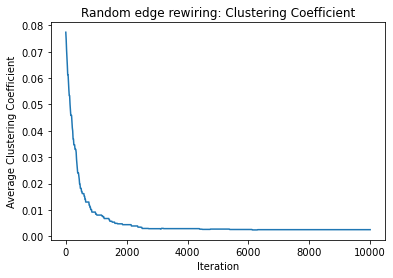

CPU times: user 11.3 s, sys: 39.8 ms, total: 11.3 s
Wall time: 11.2 s


<snap.PNGraph; proxy of <Swig Object of type 'PNGraph *' at 0x7f66661699f0> >

In [10]:
%%time
test_rewiring()

## 3.2. Exact Subgraph Enumeration (ESU) [15 points]
As we saw in class (Lecture 5), we have covered several metrics at node level (such as degree,
PageRank score and node clustering) as well as at graph level (diameter, size of components, graph
clustering coefficient). It would be useful to have something that characterized the graph at the
mesoscopic level, that is, somewhere in between looking at the whole graph and looking at a single
node. Looking at subgraphs of the network seems intuitive and will prove useful. Motifs are defined
as recurrent, significant patterns of interconnections. They can help us understand how a network
works and will help us predict the reaction of a network in a given situation.   
    
We can think of motifs as structurally identical subgraphs that occur frequently within a graph. It
may be the case that a motif of interest appears several time in the graph, with overlapping nodes.
Even though instances of the motif may overlap, we count each appearance separately.    
    
We wish to be able to count occurrences of certain subgraphs and compare with the number of
occurrences in a null model, so that we identify the patterns that occur more frequently in a given
graph and that as such, may be identied as motifs. But, as we saw in lecture, finding size-k
motifs in graphs is a complex computational challenge, since it involves enumerating all possible
size-k connected subgraphs and counting the number of occurrences of each subgraph type. This
is an NP-hard problem, since graph isomorphism is NP-complete! But dont worry! We'll tackle a
subproblem.   
     
Implement the ESU algorithm we covered in Lecture 5 to find all possible 3-subgraphs. We have
provided starter code which takes care of the graph isomorphism matching and counting problem.
Although, in general, this problem is NP-hard, for k = 3 we can exhaustively check all 3! = 6
possible permutations on node labelings to find to which of the 13 possible 3-subgraphs (shown in
Figure 4) has been identified. All you need to do is implement ESU as a recursive algorithm that
upon finding a 3-subgraph, counts it using our provided isomorphism counting implementation.   
    
Test your implementation against the provided esu test.txt dataset. Load the file as a PNGraph.
In Figure 5 you can see the graph we are loading. Then, run with the verbose option set to True
and report the output of the run.

## 3.3. Detecting motifs on real data [10 points]
Now that we are equiped with a null model and a motif counting algorithm, we will proceed to
detect motifs on real world data.   
   
   ![1007](https://habrastorage.org/webt/bi/mv/vy/bimvvyobp8vrw-8rxgaupdm_juy.png)   
       
  Figure: All possible non-isomorphic directed 3-subgraphs    
      
  ![1008](https://habrastorage.org/webt/y3/8v/la/y38vladtjqewt51x_xf1ztz5sgs.png)   
      
  Figure: The provided graph to test ESU against. Note that this graph has 6 connected 3-
subgraphs    
    

In [11]:
from itertools import permutations

def match(G1, G2):
    """

    This function compares two graphs of size 3 (number of nodes)
    and checks if they are isomorphic.
    It returns a boolean indicating whether or not they are isomorphic
    You should not need to modify it, but it is also not very elegant...


    @param G1:  snap Graph
    @param G2:  snap Graph
    @return: bool, True if graphs matches
    """

    if G1.GetEdges() > G2.GetEdges():
        G = G1
        H = G2
    else:
        G = G2
        H = G1
    # Only checks 6 permutations, since k = 3
    for p in permutations(range(3)):
        edge = G.BegEI()
        matches = True
        while edge < G.EndEI():
            if not H.IsEdge(p[edge.GetSrcNId()], p[edge.GetDstNId()]):
                matches = False
                break
            edge.Next()
        if matches:
            break
    return matches


class MotifsOnGraphs:
    """
    Compute all the motifs size 3 with ESU algo

    Arguments:
        network: path to file with the Graph represented as edge list:  one line   - one edge
        motifs_folder: path to folder with all motifs named as numberOfmotif.txt

    Attributes:
        motifs: list of motifs as snap graphs
        motif_counts : list of ints
    """

    def __init__(self, motifs_folder):
        """
        @param motifs_folder: path to folder with all motifs named as numberOfmotif.txt
                            with the Graph represented as edge list:  one line   - one edge
        """
        subgraph_fnames = [os.path.join(motifs_folder, f'{i}.txt') for i in range(13)]
        self.__k = 3
        self.motifs = [snap.LoadEdgeList(snap.PNGraph, f"{motifs_folder}{i}.txt", 0, 1) for i in
                       range(len(subgraph_fnames))]
        self.motif_counts = [0] * len(self.motifs)
        self.__nbrs_cache = {}

    def enumerate_subgraph(self, G, verbose=False):
        """
        This is the main function of the ESU algorithm.
        Here, you should iterate over all nodes in the graph,
        find their neighbors with ID greater than the current node
        and issue the recursive call to extend_subgraph in each iteration

        A good idea would be to print a progress report on the cycle over nodes,
        So you get an idea of how long the algorithm needs to run

        @param G: snap Graph
        @param verbose: bool
        @return: list of int motifs count
        """

        self.motif_counts = [0] * len(self.motifs)  # Reset the motif counts (Do not remove)
        ##########################################################################
        for Node in G.Nodes():
            node_id = Node.GetId()
            if verbose:
                print(f"Node {node_id} is processing: ")

            v_ext = {el for el in self.getNbrs(G, node_id) if el > node_id}
            self.extend_subgraph(G, {node_id}, v_ext, node_id, verbose)
        self.__nbrs_cache = {}

    def count_iso(self, G, sg, verbose=False):
        """

        Given a set of 3 node indices in sg, obtains the subgraph from the
        original graph and renumbers the nodes from 0 to 2.
        It then matches this graph with one of the 13 graphs in
        directed_3.
        When it finds a match, it increments the motif_counts by 1 in the relevant
        index

        IMPORTANT: counts are stored in global motif_counts variable.
        It is reset at the beginning of the enumerate_subgraph method.

        @param G: snap Graph
        @param sg: list of ints
        @param verbose: bool, print list of node indices
        @return: motif_counts
        """

        if verbose:
            print(sg)
        nodes = snap.TIntV()
        for NId in sg:
            nodes.Add(NId)

        SG = snap.GetSubGraphRenumber(G, nodes)
        for i in range(len(self.motifs)):
            if match(self.motifs[i], SG):
                self.motif_counts[i] += 1
                break

    def extend_subgraph(self, G, sg, v_ext, node_id, verbose=False):
        """
         This is the recursive function in the ESU algorithm
        The base case is already implemented and calls count_iso. You should not
        need to modify this.

        Implement the recursive case.

        @param sg: set of int subgraph members
        @param v_ext:  set of int extensions member
        @param node_id: int node index
        @param verbose: bool
        @return: motif counter
        """

        # Base case (you should not need to modify this):
        if len(sg) is self.__k:
            # print(sg)
            self.count_iso(G, sg, verbose)
            return
        # Recursive step:
        ##########################################################################
        while len(v_ext) > 0:
            w = v_ext.pop()
            #            if len(sg) <  self.__k-1:
            Nw = self.getExclsNbrs(G, w, sg)
            to_extend = {ni for ni in Nw if ni > node_id}

            self.extend_subgraph(G, set.union(sg, {w}), set.union(v_ext, to_extend), node_id, verbose)

    def getExclsNbrs(self, G, node_include, nodes_excl):
        incl_set = self.getNbrs(G, node_include)
        excl_set = set(nodes_excl)
        [excl_set.update(self.getNbrs(G, ni)) for ni in nodes_excl]
        return incl_set.difference(excl_set)

    def getNbrs(self, G, node_id):
        if node_id in self.__nbrs_cache:
            return self.__nbrs_cache[node_id]
        NodeVec = snap.TIntV()
        snap.GetNodesAtHop(G, node_id, 1, NodeVec, False)
        nbrs = set(NodeVec)
        self.__nbrs_cache[node_id] = nbrs
        return nbrs



In [12]:
mfs = MotifsOnGraphs(motifs_folder)

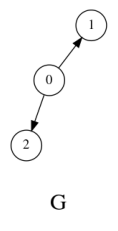

In [13]:
#plot one of the motif with index i
draw_graph(mfs.motifs[0], 'motif.png')

***enumerate_subgraph*** 

Basic function for motifs counting. 

What do we need to do:

    - implement ESU algo to enlist all possibles subgraphs with the size 3
    - find matching through the one of the 13 basic motifs taking into account isomorphism graph 

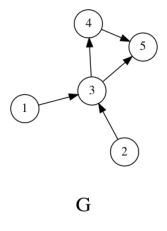

Node 1 is processing: 
{1, 2, 3}
{1, 3, 4}
{1, 3, 5}
Node 3 is processing: 
{3, 4, 5}
Node 2 is processing: 
{2, 3, 4}
{2, 3, 5}
Node 4 is processing: 
Node 5 is processing: 


In [14]:
G1 = load_graph('/kaggle/input/cs224whw2018/esu_test.txt')
draw_graph(G1, 'esu_test.png')
mfs.enumerate_subgraph(G1, verbose=True)

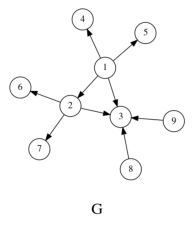

Node 1 is processing: 
{1, 2, 3}
{1, 2, 4}
{1, 2, 5}
{1, 2, 6}
{1, 2, 7}
{8, 1, 3}
{1, 3, 9}
{1, 3, 4}
{1, 3, 5}
{1, 4, 5}
Node 2 is processing: 
{8, 2, 3}
{9, 2, 3}
{2, 3, 6}
{2, 3, 7}
{2, 6, 7}
Node 3 is processing: 
{8, 9, 3}
Node 4 is processing: 
Node 5 is processing: 
Node 6 is processing: 
Node 7 is processing: 
Node 8 is processing: 
Node 9 is processing: 


In [15]:
G2 = test_esu_graph()
draw_graph(G2, 'test_esu.png')
mfs.enumerate_subgraph(G2, verbose=True)

## Experiment with power grid graph
Load the provided USpowergrid n4941.txt dataset as a PNGraph. Compute the motif frequencies
using your ESU implementation from the previous exercise. Now, sample 10 instances from the
conguration model using this graph a starting point. Note that depending on your implementation
you may need to reload the graph to generate each conguration model instance. Compute the
motif frequencies on each of the 10 samples random graphs and store the results. You may use a
numpy array of size 1013 to store your motif counts. Compute the per-motif mean and standard
deviation for the motif counts on these 10 runs and use it to compute the Z scores. Recall:   
   
   ![1009](https://habrastorage.org/webt/mh/yd/ol/mhydol-z7mejareqwyx1btqroc4.png)   
      
where N(i) is the number of times motif i appeared in the original graph, N
(i)
sampled is the mean
number of times motif i appeared in the 10 sampled graphs and std(N(i)
sampled) is the standard
deviation of the sampled motif frequencies for motif i.
    
    
Plot the Z scores against their respective motif index and comment (1-2 sentences) on the results.
   

Repeat the above process for the email-Eu-core.txt dataset also loaded as a PNGraph. Report
the obtained Z score plot along with comments as before.   
   
Our reference implementation of the solution runs in about 10 minutes for the USpowergrid dataset
and about 2.5 hours for the email-Eu dataset.

In [16]:
graphpath = '/kaggle/input/cs224whw2018/USpowergrid_n4941.txt'
G = load_graph(graphpath)

In [17]:
node_id = 1
nbrs = mfs.getNbrs(G,1)
nbr_nbrs = set()
[nbr_nbrs.update(mfs.getNbrs(G, ni)) for ni in nbrs]
nbrs.update(nbr_nbrs)
print(nbrs)

{1, 386, 387, 452, 388, 2308, 454, 420, 2214, 394, 396, 409, 2394, 446, 447}


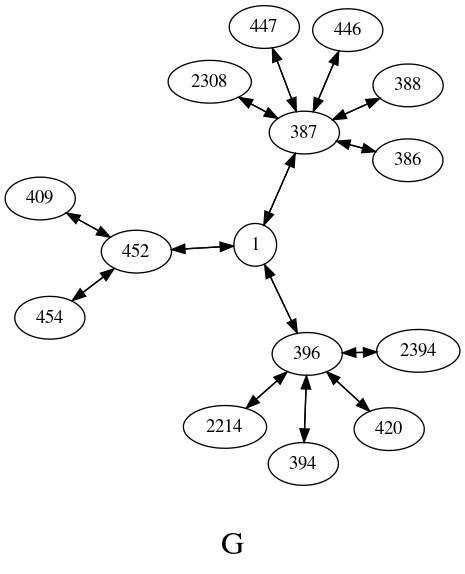

In [18]:
node_list = list(nbrs)
nodes = snap.TIntV()
for NId in node_list:
    nodes.Add(NId)
SG = snap.GetSubGraph(G, nodes)
draw_graph(SG,'SG.png', show = False)  
Image('SG.png')

In [19]:
%%time
mfs.enumerate_subgraph(G, verbose=False)
print(f'Vectors of motifs: \n {mfs.motif_counts}')
real_scores = mfs.motif_counts

Vectors of motifs: 
 [0, 0, 0, 0, 0, 0, 0, 16980, 0, 0, 0, 0, 651]
CPU times: user 3.93 s, sys: 0 ns, total: 3.93 s
Wall time: 3.93 s


Compare with motif distribution for configuration model

In [20]:
%%time
conf_motifs = []
for i in range(10):
    print(i)
    config_graph, clustering_coeffs = gen_config_model_rewire(G, 10000)
    mfs.enumerate_subgraph(config_graph, verbose=False)
    print(f'Vectors of motifs for {i} config graph: \n {mfs.motif_counts}')
    conf_motifs.append(mfs.motif_counts)

0
Vectors of motifs for 0 config graph: 
 [21979, 43881, 151, 22281, 34, 0, 139, 0, 16, 1, 0, 0, 0]
1
Vectors of motifs for 1 config graph: 
 [22187, 44186, 88, 22029, 34, 0, 96, 0, 9, 1, 0, 0, 0]
2
Vectors of motifs for 2 config graph: 
 [22248, 44211, 35, 22166, 36, 0, 41, 0, 9, 0, 0, 0, 0]
3
Vectors of motifs for 3 config graph: 
 [22379, 44505, 27, 21775, 28, 0, 43, 0, 9, 0, 0, 0, 0]
4
Vectors of motifs for 4 config graph: 
 [22167, 44202, 63, 22123, 39, 0, 71, 0, 11, 0, 0, 0, 0]
5
Vectors of motifs for 5 config graph: 
 [22346, 44398, 4, 21986, 42, 0, 6, 0, 14, 0, 0, 0, 0]
6
Vectors of motifs for 6 config graph: 
 [21879, 44411, 49, 22273, 38, 0, 45, 0, 15, 0, 0, 0, 0]
7
Vectors of motifs for 7 config graph: 
 [21966, 44274, 59, 22298, 32, 0, 57, 0, 14, 0, 0, 0, 0]
8
Vectors of motifs for 8 config graph: 
 [21966, 44430, 50, 22184, 36, 0, 38, 0, 13, 1, 0, 0, 0]
9
Vectors of motifs for 9 config graph: 
 [22220, 44164, 61, 22122, 43, 0, 49, 0, 17, 0, 0, 0, 0]
CPU times: user 3min 2s

In [21]:
pd.DataFrame(pd.DataFrame(conf_motifs).T.values, columns=['Experiment #%s' % str(x+1) for x in range(10)])

,Experiment #1,Experiment #2,Experiment #3,Experiment #4,Experiment #5,Experiment #6,Experiment #7,Experiment #8,Experiment #9,Experiment #10
0,21979,22187,22248,22379,22167,22346,21879,21966,21966,22220
1,43881,44186,44211,44505,44202,44398,44411,44274,44430,44164
2,151,88,35,27,63,4,49,59,50,61
3,22281,22029,22166,21775,22123,21986,22273,22298,22184,22122
4,34,34,36,28,39,42,38,32,36,43
5,0,0,0,0,0,0,0,0,0,0
6,139,96,41,43,71,6,45,57,38,49
7,0,0,0,0,0,0,0,0,0,0
8,16,9,9,9,11,14,15,14,13,17
9,1,1,0,0,0,0,0,0,1,0


In [22]:
z_scores = (real_scores - np.mean(conf_motifs, axis = 0))/np.std(conf_motifs, axis = 0)
pd.DataFrame([z_scores, real_scores], index=['Z-score', 'Motif count'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
Z-score,-133.530461,-257.867854,-1.561584,-145.135364,-8.402714,NaN,-1.685907,inf,-4.432331,-0.654654,NaN,NaN,inf
Motif count,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,16980.0,0.000000,0.000000,0.0,0.0,651.0
